In [2]:
import pandas as pd
import pandas as pd

In [3]:
df=pd.read_csv('emails.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [5]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
df.rename(columns={'spam':'target'},inplace=True)
df.sample(5)

,text,target
3757,Subject: termination payments - ees energy out...,0
5651,"Subject: re : from vicky windsor vicky , ple...",0
5391,Subject: fasbl 33 presentation hello all : p...,0
129,Subject: major medical breakthrough huge profi...,1
310,Subject: blow yourr life want to know how to ...,1


In [7]:
df.duplicated().sum()

33

In [8]:
df = df.drop_duplicates(keep='first')

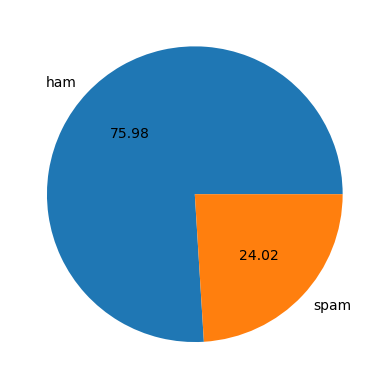

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [10]:
#the given dataset is imbalanced

In [11]:
df['target'].value_counts()

target
0    4327
1    1368
Name: count, dtype: int64

In [12]:
import nltk

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krishna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['num_characters'] = df['text'].apply(len)

C:\Users\krishna\AppData\Local\Temp\ipykernel_24968\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [15]:
df.head()

,text,target,num_characters
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [16]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\krishna\AppData\Local\Temp\ipykernel_24968\192676766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [17]:
df

,text,target,num_characters,num_words
0,Subject: naturally irresistible your corporate...,1,1484,325
1,Subject: the stock trading gunslinger fanny i...,1,598,90
2,Subject: unbelievable new homes made easy im ...,1,448,88
3,Subject: 4 color printing special request add...,1,500,99
4,"Subject: do not have money , get software cds ...",1,235,53
...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298
5724,"Subject: re : receipts from visit jim , than...",0,1167,245
5725,Subject: re : enron case study update wow ! a...,0,2131,516
5726,"Subject: re : interest david , please , call...",0,1060,277


In [18]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\krishna\AppData\Local\Temp\ipykernel_24968\4112269855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [19]:
df

,text,target,num_characters,num_words,num_sentences
0,Subject: naturally irresistible your corporate...,1,1484,325,11
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1
2,Subject: unbelievable new homes made easy im ...,1,448,88,4
3,Subject: 4 color printing special request add...,1,500,99,5
4,"Subject: do not have money , get software cds ...",1,235,53,9
...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30
5726,"Subject: re : interest david , please , call...",0,1060,277,6


In [20]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5695.000000,5695.000000,5695.000000
mean,1558.067076,328.214047,19.462511
std,2047.078711,419.654234,35.981993
min,13.000000,3.000000,1.000000
25%,508.500000,102.000000,7.000000
50%,979.000000,211.000000,12.000000
75%,1893.000000,403.000000,22.000000
max,43952.000000,8479.000000,1565.000000


In [21]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [22]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


<Axes: xlabel='num_characters', ylabel='Count'>

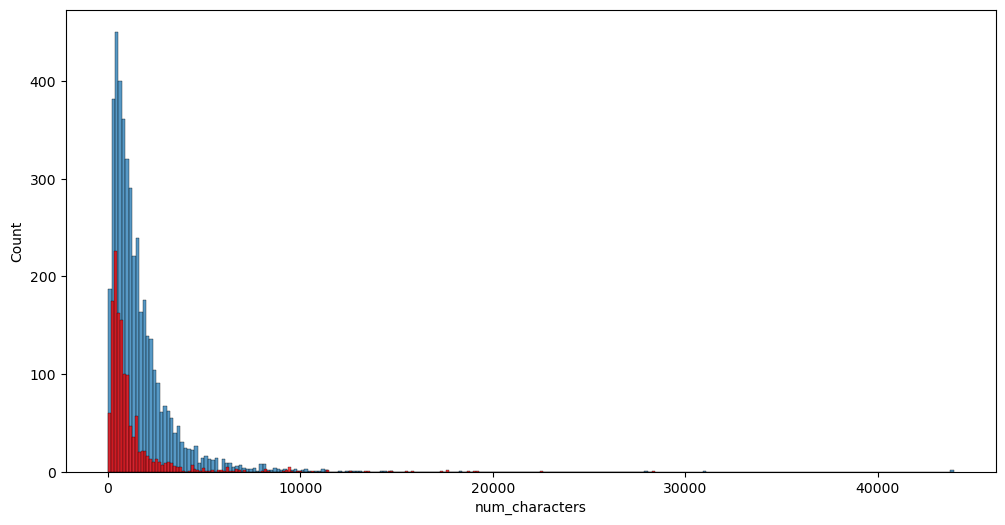

In [23]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

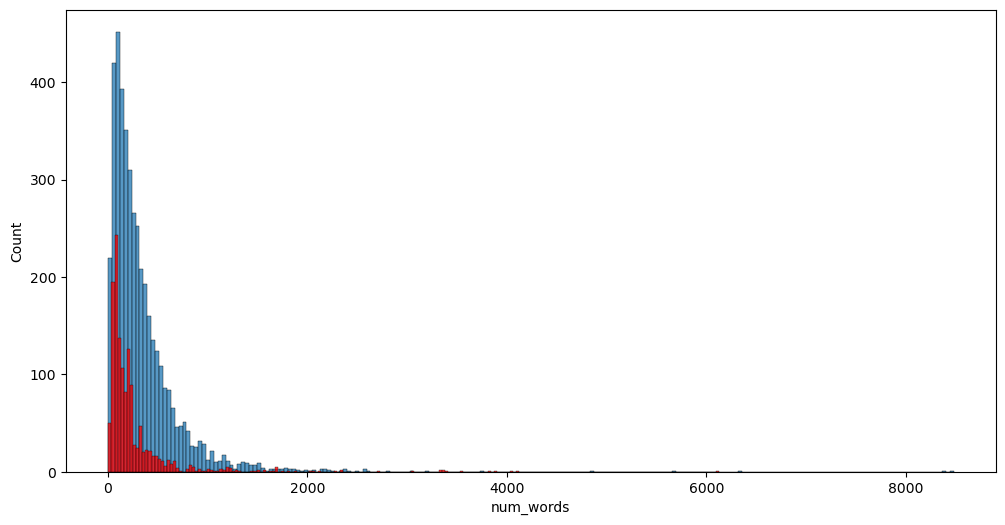

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\Users\krishna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


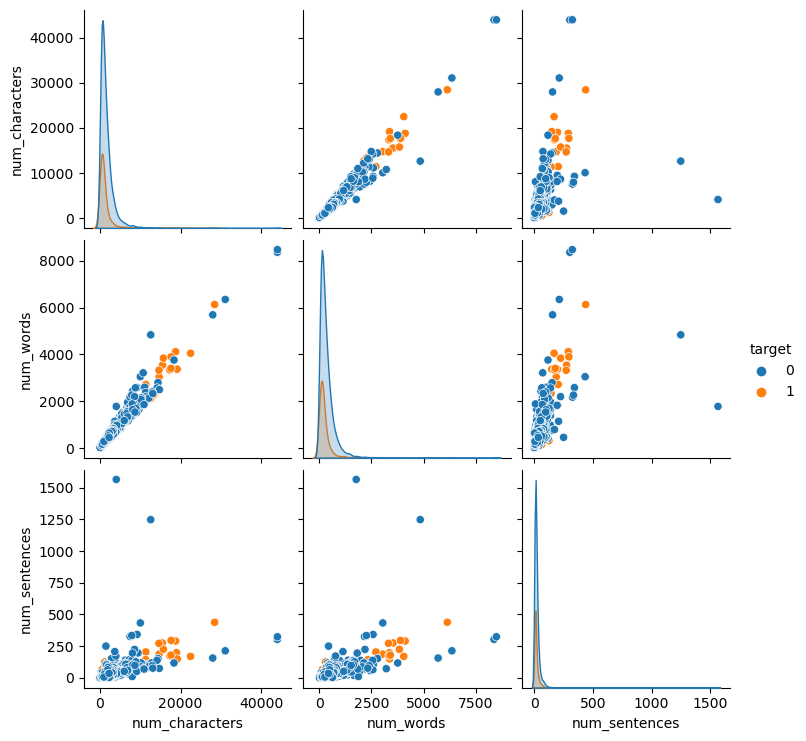

In [25]:
sns.pairplot(df,hue='target')

In [26]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [27]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [28]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\krishna\AppData\Local\Temp\ipykernel_24968\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [29]:
df

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...
...,...,...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,298,7,subject research develop charg gpg forward shi...
5724,"Subject: re : receipts from visit jim , than...",0,1167,245,28,subject receipt visit jim thank invit visit ls...
5725,Subject: re : enron case study update wow ! a...,0,2131,516,30,subject enron case studi updat wow day super t...
5726,"Subject: re : interest david , please , call...",0,1060,277,6,subject interest david pleas call shirley cren...


In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [32]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

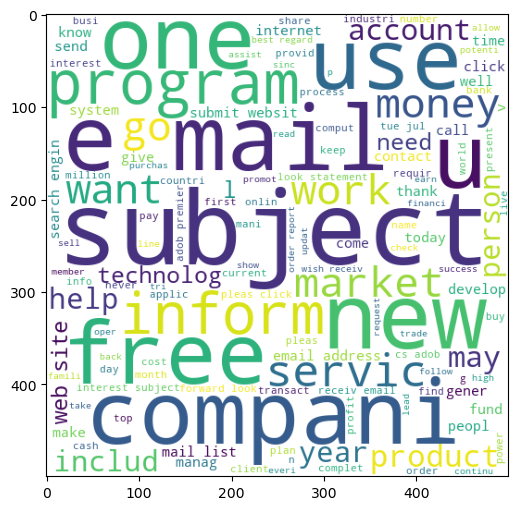

In [33]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [34]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

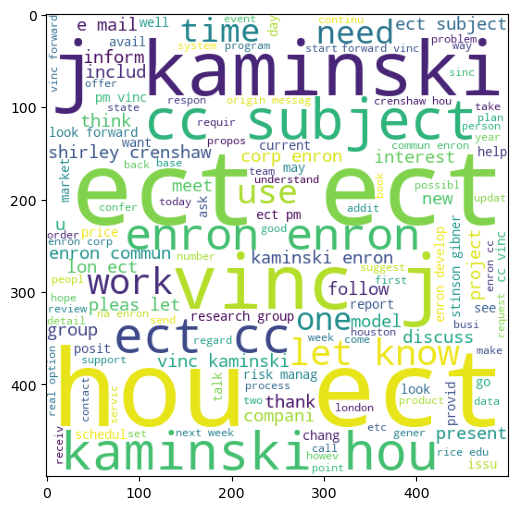

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [36]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [37]:
len(spam_corpus)

174630

In [38]:
# Text Vectorization
# using Bag of Words
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,Subject: naturally irresistible your corporate...,1,1484,325,11,subject natur irresist corpor ident lt realli ...
1,Subject: the stock trading gunslinger fanny i...,1,598,90,1,subject stock trade gunsling fanni merril muzo...
2,Subject: unbelievable new homes made easy im ...,1,448,88,4,subject unbeliev new home made easi im want sh...
3,Subject: 4 color printing special request add...,1,500,99,5,subject 4 color print special request addit in...
4,"Subject: do not have money , get software cds ...",1,235,53,9,subject money get softwar cd softwar compat gr...


In [39]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [40]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [41]:
y = df['target'].values

In [42]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [45]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [46]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [47]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.95171202809482
[[837  12]
 [ 43 247]]
0.9536679536679536


In [48]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9850746268656716
[[846   3]
 [ 14 276]]
0.989247311827957


In [49]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429323968393327
[[785  64]
 [  1 289]]
0.8186968838526912


In [50]:
# tfidf --> MNB

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [52]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [53]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [54]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [55]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.990342405618964, 0.9929328621908127)

In [56]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.990342405618964
Precision -  0.9929328621908127
For  KN
Accuracy -  0.9771729587357331
Precision -  0.9782608695652174
For  NB
Accuracy -  0.9850746268656716
Precision -  0.989247311827957
For  DT
Accuracy -  0.9236172080772608
Precision -  0.8048048048048048
For  LR
Accuracy -  0.971027216856892
Precision -  0.9706959706959707
For  RF
Accuracy -  0.9824407374890255
Precision -  0.9927007299270073
For  AdaBoost
Accuracy -  0.9692712906057945
Precision -  0.967032967032967
For  BgC
Accuracy -  0.9657594381035997
Precision -  0.9403508771929825
For  ETC
Accuracy -  0.9833187006145742
Precision -  0.9927272727272727
For  GBDT
Accuracy -  0.9561018437225637
Precision -  0.9651162790697675
For  xgb
Accuracy -  0.9885864793678666
Precision -  0.9632107023411371


In [57]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [58]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.990342,0.992933
8,ETC,0.983319,0.992727
5,RF,0.982441,0.992701
2,NB,0.985075,0.989247
1,KN,0.977173,0.978261
4,LR,0.971027,0.970696
6,AdaBoost,0.969271,0.967033
9,GBDT,0.956102,0.965116
10,xgb,0.988586,0.963211
7,BgC,0.965759,0.940351


In [59]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [60]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.990342
1,ETC,Accuracy,0.983319
2,RF,Accuracy,0.982441
3,NB,Accuracy,0.985075
4,KN,Accuracy,0.977173
5,LR,Accuracy,0.971027
6,AdaBoost,Accuracy,0.969271
7,GBDT,Accuracy,0.956102
8,xgb,Accuracy,0.988586
9,BgC,Accuracy,0.965759


C:\Users\krishna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


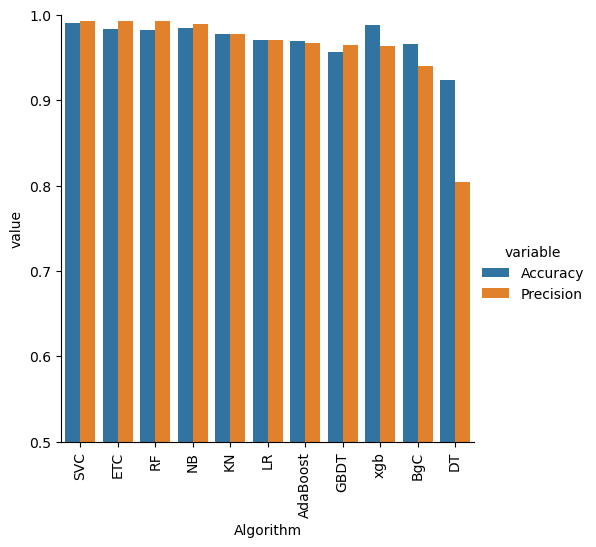

In [61]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [63]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [64]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [65]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [66]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [67]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [68]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.990342,0.992933,0.990342,0.992933,0.990342,0.992933,0.990342,0.992933
1,ETC,0.983319,0.992727,0.983319,0.992727,0.983319,0.992727,0.983319,0.992727
2,RF,0.982441,0.992701,0.982441,0.992701,0.982441,0.992701,0.982441,0.992701
3,NB,0.985075,0.989247,0.985075,0.989247,0.985075,0.989247,0.985075,0.989247
4,KN,0.977173,0.978261,0.977173,0.978261,0.977173,0.978261,0.977173,0.978261
5,LR,0.971027,0.970696,0.971027,0.970696,0.971027,0.970696,0.971027,0.970696
6,AdaBoost,0.969271,0.967033,0.969271,0.967033,0.969271,0.967033,0.969271,0.967033
7,GBDT,0.956102,0.965116,0.956102,0.965116,0.956102,0.965116,0.956102,0.965116
8,xgb,0.988586,0.963211,0.988586,0.963211,0.988586,0.963211,0.988586,0.963211
9,BgC,0.965759,0.940351,0.965759,0.940351,0.965759,0.940351,0.965759,0.940351


In [69]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [70]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [71]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [72]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [74]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.990342405618964
Precision 0.9929328621908127


In [75]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier

In [77]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [78]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9885864793678666
Precision 0.9859649122807017


In [79]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [80]:
pickle.dump(mnb,open('clf.pkl','wb'))